In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Прочитайте данные (переменную назовите 'df')
df = pd.read_csv('data.csv')

# Вывести несколько первых строк таблицы данных
print(df.head())

         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0           4
1  2018-01-04      1  address_0    product_1           4
2  2018-01-04      1  address_0    product_2           5
3  2018-01-04      1  address_0    product_3          10
4  2018-01-04      1  address_0    product_4           2


Проверяем формат столбцов

In [4]:
df.dtypes

Дата            object
Склад            int64
Контрагент      object
Номенклатура    object
Количество       int64
dtype: object

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301355 entries, 0 to 301354
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Дата          301355 non-null  object
 1   Склад         301355 non-null  int64 
 2   Контрагент    301355 non-null  object
 3   Номенклатура  301355 non-null  object
 4   Количество    301355 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.5+ MB


Сразу переведем столбец "Дата" в правильный формат

In [5]:
df['Дата'] = pd.to_datetime(df['Дата'])

In [6]:
df.dtypes

Дата            datetime64[ns]
Склад                    int64
Контрагент              object
Номенклатура            object
Количество               int64
dtype: object

Сгруппируйте данные по дате, посчитайте количество продаж

In [30]:
grouped_df = df.groupby('Дата')['Количество'].sum().reset_index()

Вывести несколько первых строк сгруппированных данных

In [31]:
print(grouped_df.head())

        Дата  Количество
0 2018-01-04        3734
1 2018-01-05        3643
2 2018-01-06        3193
3 2018-01-07        3298
4 2018-01-09        4055


In [39]:
print(grouped_df.tail())

          Дата  Количество
200 2018-08-26        5302
201 2018-08-28        5983
202 2018-08-29        4969
203 2018-08-30        4648
204 2018-08-31        4570


Нарисуйте график продаж у `grouped_df`

In [148]:
monthly_sales = df.resample('ME', on='Дата')['Количество'].sum()

In [149]:
month_names = monthly_sales.index.strftime('%B %Y')
month_names

Index(['January 2018', 'February 2018', 'March 2018', 'April 2018', 'May 2018',
       'June 2018', 'July 2018', 'August 2018'],
      dtype='object', name='Дата')

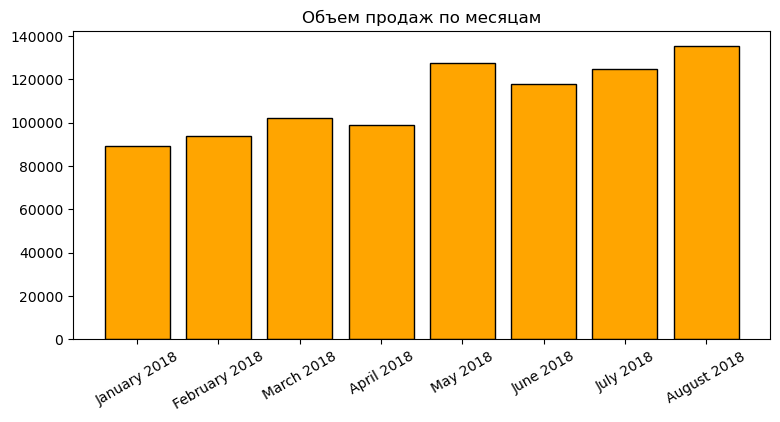

In [52]:
plt.figure(figsize=(9, 4))
plt.bar(month_names, monthly_sales.values, color='orange', edgecolor='black')
plt.title('Объем продаж по месяцам')
plt.xticks(rotation=30)
plt.show()

Опишите что вы видите на графике. Ваша задача - максимально описать график

Глядя на график, мы можем сказать, что: с января по август 2018 года продажи выросли. 
Весь период наблюдается стабильный восходящий тренд, хотя и с небольшими откатами в апреле и июне.  
Пика по выручке достигли в августе. 
В целом динамика продаж положительная.

Найдите строку, у которой максимальный выброс по количеству продаж (нужно найти выброс у `df`)

In [60]:
max_outlier = df[df['Количество'] == df['Количество'].max()]

In [61]:
print(max_outlier)

             Дата  Склад   Контрагент Номенклатура  Количество
218822 2018-06-28      1  address_208    product_0         200


Найдите топовый товар по продажам по средам за июнь, июль, август у 3 склада

In [62]:
df['Месяц'] = df['Дата'].dt.month
df['День_недели'] = df['Дата'].dt.dayofweek

In [63]:
df.head()

,Дата,Склад,Контрагент,Номенклатура,Количество,Месяц,День_недели
0,2018-01-04,1,address_0,product_0,4,1,3
1,2018-01-04,1,address_0,product_1,4,1,3
2,2018-01-04,1,address_0,product_2,5,1,3
3,2018-01-04,1,address_0,product_3,10,1,3
4,2018-01-04,1,address_0,product_4,2,1,3


In [64]:
wednesdays_jja = df.query("Склад == 3 and Месяц in [6, 7, 8] and День_недели == 2")

In [65]:
wednesdays_jja

,Дата,Склад,Контрагент,Номенклатура,Количество,Месяц,День_недели
191165,2018-06-06,3,address_206,product_0,2,6,2
191166,2018-06-06,3,address_206,product_1,4,6,2
191167,2018-06-06,3,address_206,product_2,4,6,2
191168,2018-06-06,3,address_206,product_3,2,6,2
191169,2018-06-06,3,address_206,product_4,1,6,2
...,...,...,...,...,...,...,...
298028,2018-08-29,3,address_112,product_2,3,8,2
298029,2018-08-29,3,address_112,product_3,3,8,2
298030,2018-08-29,3,address_112,product_4,2,8,2
298031,2018-08-29,3,address_112,product_5,1,8,2


In [67]:
top_product = wednesdays_jja.groupby('Номенклатура')['Количество'].sum().idxmax()
total_qty = wednesdays_jja.groupby('Номенклатура')['Количество'].sum().max()

In [70]:
print(f"Самый топовый товар по продажам по средам за июнь, июль, август у 3 склада: {top_product} (Продано {total_qty} шт.)")

Самый топовый товар по продажам по средам за июнь, июль, август у 3 склада: product_1 (Продано 2267 шт.)


Скачайте данные по погоде с https://rp5.ru/Архив_погоды_в_Астане (скачайте исходные данные, и далее преобразуйте так, чтобы мы имели Дату и Среднюю температуру за день), объедините таблицу температуры с `grouped_df`, и нарисуйте график `y=['Количество продаж', 'T']`, где Т это температура. А также отдельно график температуры.

In [98]:
weather = pd.read_csv("weather.csv", sep=";", encoding="cp1251", skiprows=6, index_col=False)

In [99]:
weather.head()

,Местное время в Астане,T,Po,P,Pa,U,DD,Ff,ff10,ff3,...,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss
0,31.08.2018 23:00,8.2,736.6,768.3,0.2,78.0,"Ветер, дующий с северо-востока",4,NaN,NaN,...,"Высококучевых, высокослоистых или слоисто-дожд...","Перистых, перисто-кучевых или перисто-слоистых...",NaN,4.6,Следы осадков,12.0,NaN,NaN,NaN,NaN
1,31.08.2018 20:00,9.6,736.4,767.9,1.2,88.0,"Ветер, дующий с западо-северо-запада",3,NaN,NaN,...,"Высококучевых, высокослоистых или слоисто-дожд...","Перистых, перисто-кучевых или перисто-слоистых...",NaN,7.7,Следы осадков,12.0,NaN,NaN,NaN,NaN
2,31.08.2018 17:00,11.3,735.2,766.4,0.4,83.0,"Ветер, дующий с востоко-северо-востока",4,NaN,NaN,...,NaN,NaN,10.0,8.5,NaN,NaN,NaN,NaN,NaN,NaN
3,31.08.2018 14:00,12.3,734.8,765.9,0.9,80.0,"Ветер, дующий с северо-востока",4,NaN,NaN,...,NaN,NaN,4.0,8.9,NaN,NaN,NaN,NaN,NaN,NaN
4,31.08.2018 11:00,13.2,733.9,764.8,1.0,83.0,"Ветер, дующий с северо-северо-востока",4,NaN,NaN,...,NaN,NaN,10.0,10.3,3.0,12.0,NaN,NaN,NaN,NaN


In [100]:
weather = weather.iloc[:, [0, 1]]

In [101]:
weather.head()

,Местное время в Астане,T
0,31.08.2018 23:00,8.2
1,31.08.2018 20:00,9.6
2,31.08.2018 17:00,11.3
3,31.08.2018 14:00,12.3
4,31.08.2018 11:00,13.2


In [102]:
weather.columns = ['Дата', 'Т']

In [103]:
weather['Дата'] = pd.to_datetime(weather['Дата'], dayfirst=True)
weather['Дата'] = weather['Дата'].dt.date

In [104]:
weather.head()

,Дата,Т
0,2018-08-31,8.2
1,2018-08-31,9.6
2,2018-08-31,11.3
3,2018-08-31,12.3
4,2018-08-31,13.2


In [105]:
daily_weather = weather.groupby('Дата')['Т'].mean().reset_index()

In [106]:
daily_weather.head()

,Дата,Т
0,2018-01-04,-14.0750
1,2018-01-05,-16.8625
2,2018-01-06,-13.3000
3,2018-01-07,-12.7500
4,2018-01-08,-15.4125


In [107]:
daily_weather.dtypes

Дата     object
Т       float64
dtype: object

In [109]:
daily_weather['Дата'] = pd.to_datetime(daily_weather['Дата'])

In [110]:
daily_weather.dtypes

Дата    datetime64[ns]
Т              float64
dtype: object

In [111]:
final_df = pd.merge(grouped_df, daily_weather, on='Дата', how='inner')

In [112]:
final_df.head()

,Дата,Количество,Т
0,2018-01-04,3734,-14.0750
1,2018-01-05,3643,-16.8625
2,2018-01-06,3193,-13.3000
3,2018-01-07,3298,-12.7500
4,2018-01-09,4055,-6.2500


In [120]:
final_df.tail()

,Дата,Количество,Т
200,2018-08-26,5302,11.9750
201,2018-08-28,5983,14.1125
202,2018-08-29,4969,13.8250
203,2018-08-30,4648,14.1750
204,2018-08-31,4570,11.0250


In [142]:
temp_monthly = final_df.set_index('Дата')['Т'].resample('ME').mean()

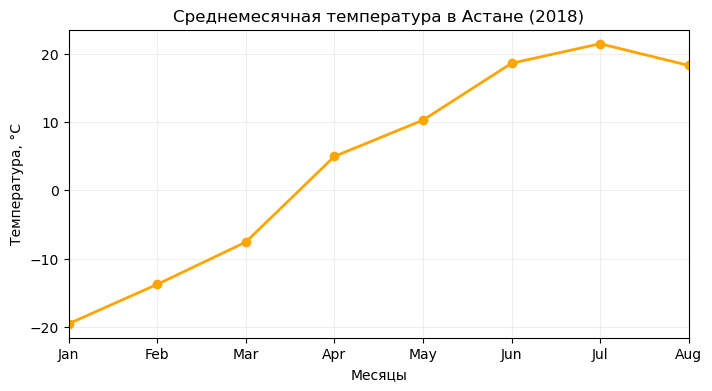

In [147]:
plt.figure(figsize=(8, 4))
temp_monthly.plot(kind='line', marker='o', color='orange', linewidth=2)
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug']
plt.xticks(ticks=temp_monthly.index, labels=months[:len(temp_monthly)], rotation=0)
plt.title('Среднемесячная температура в Астане (2018)')
plt.ylabel('Температура, °C')
plt.xlabel('Месяцы')
plt.grid(True, alpha=0.2)
plt.show()

In [131]:
monthly_df = final_df.resample('ME', on='Дата').agg({'Т': 'mean','Количество': 'sum'}).reset_index()
monthly_df['Месяц'] = monthly_df['Дата'].dt.strftime('%b')

In [133]:
monthly_df.head()

,Дата,Т,Количество,Месяц
0,2018-01-31,-19.542188,89183,Jan
1,2018-02-28,-13.777604,93839,Feb
2,2018-03-31,-7.590385,102064,Mar
3,2018-04-30,4.954000,98833,Apr
4,2018-05-31,10.263889,127440,May


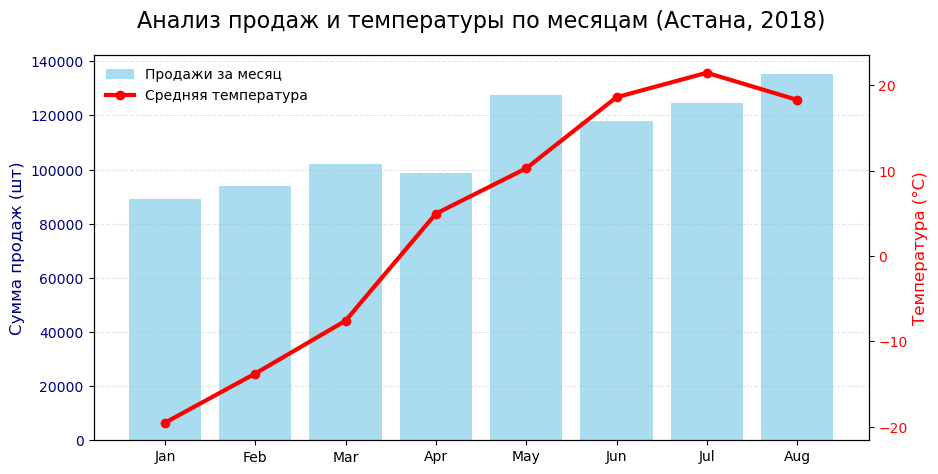

In [135]:
fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.bar(monthly_df['Месяц'], monthly_df['Количество'], color='skyblue', alpha=0.7, label='Продажи за месяц')
ax1.set_ylabel('Сумма продаж (шт)', fontsize=12, color='navy')
ax1.tick_params(axis='y', labelcolor='navy')

ax2 = ax1.twinx()
ax2.plot(monthly_df['Месяц'], monthly_df['Т'], color='red', marker='o', linewidth=3, label='Средняя температура')
ax2.set_ylabel('Температура (°C)', fontsize=12, color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Анализ продаж и температуры по месяцам (Астана, 2018)', fontsize=16, pad=20)
ax1.grid(axis='y', linestyle='--', alpha=0.3)

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left', frameon=False)

plt.show()